<a href="https://colab.research.google.com/github/muhnasih/PCVK_GANJIL_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D. PERCOBAAN PRAKTIKUM

**D-1 PERCOBAAN HISTOGRAM**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


<BarContainer object of 256 artists>

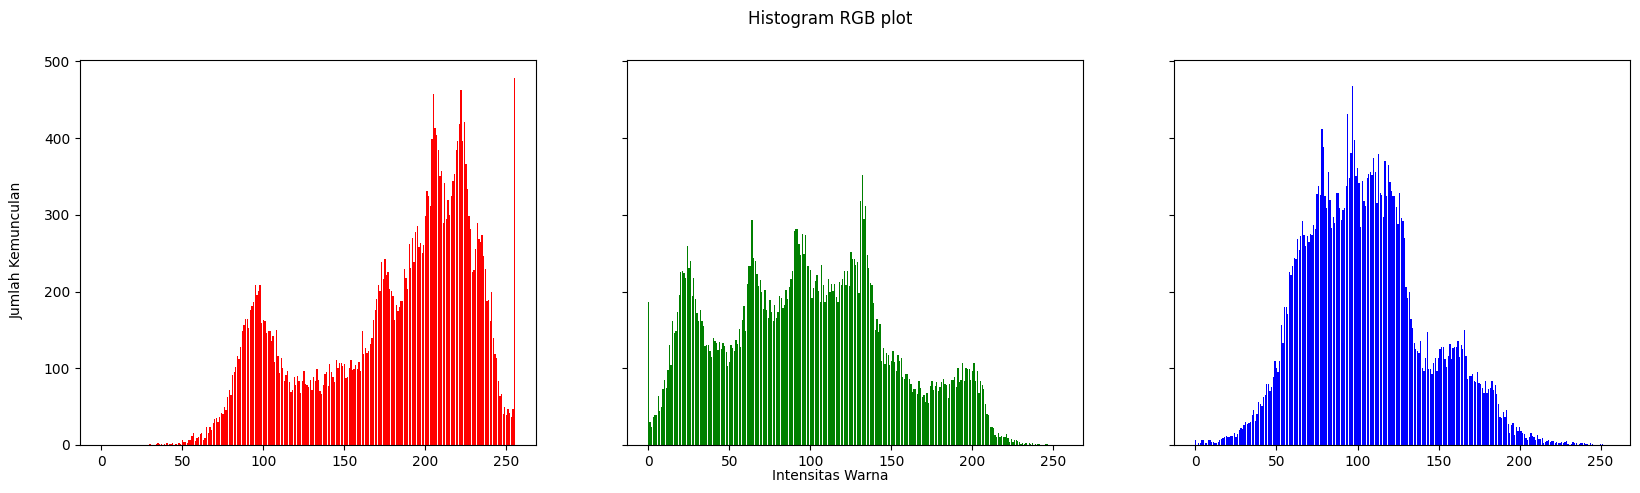

In [ ]:
# membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/Image/lenna.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


PERTANYAAN PRAKTIKUM D1
1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?
2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

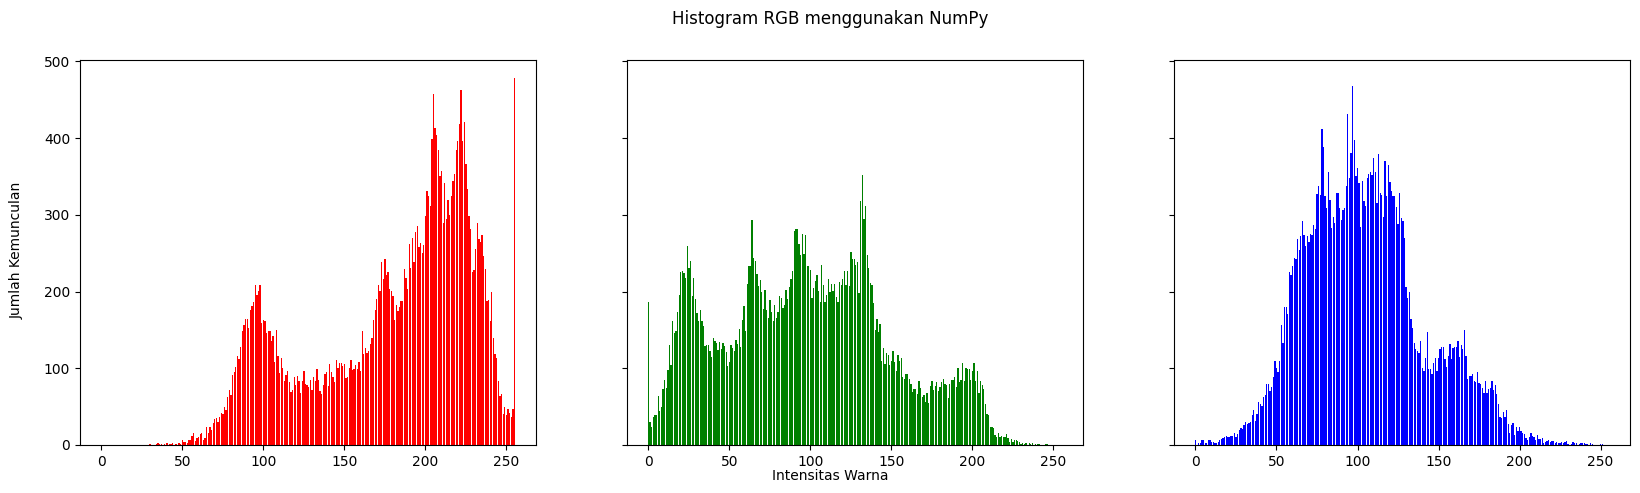

In [ ]:
#soal 1
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# baca gambar
img = cv.imread('/content/drive/MyDrive/Image/lenna.jpeg')
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, cek path atau nama file!")

# konversi BGR ke RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# pisahkan channel R, G, B
r = img[:,:,0].flatten()
g = img[:,:,1].flatten()
b = img[:,:,2].flatten()

# hitung histogram pakai numpy
hist_r, bins_r = np.histogram(r, bins=256, range=(0,256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0,256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0,256))

# plot hasilnya
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB menggunakan NumPy')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(np.arange(256), hist_r, color='red')
axs[1].bar(np.arange(256), hist_g, color='green')
axs[2].bar(np.arange(256), hist_b, color='blue')
plt.show()



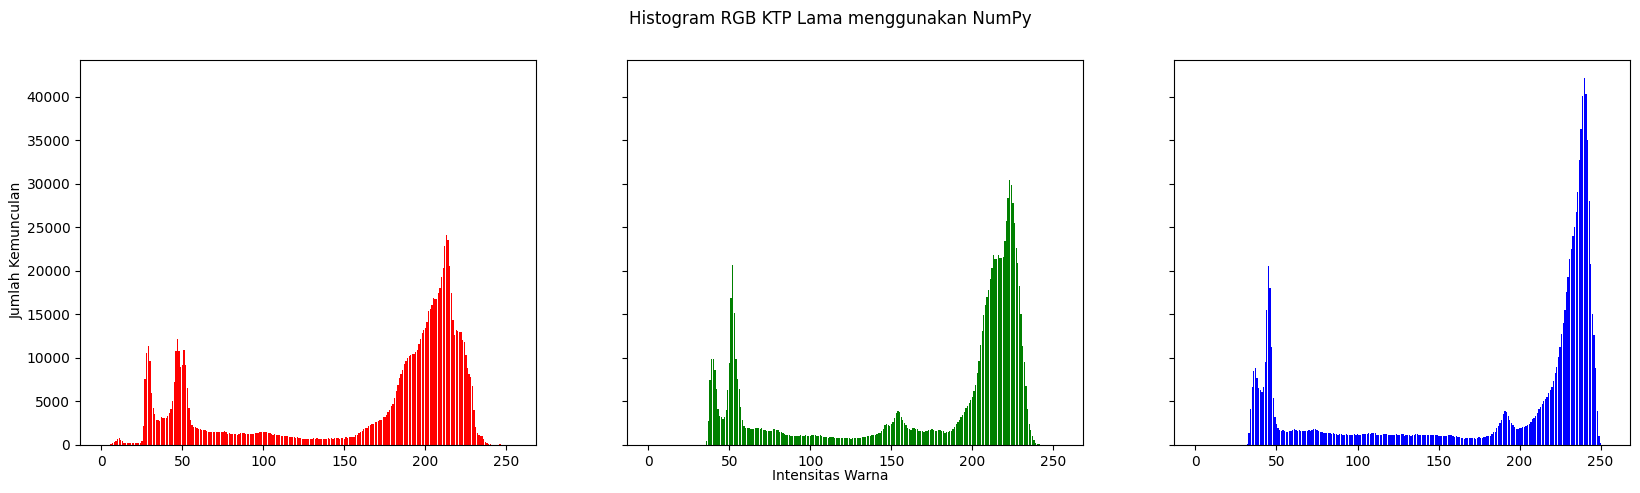

In [ ]:
#soal 2
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# baca gambar
img = cv.imread('/content/drive/MyDrive/Image/KTP_OHIM.png')
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, cek path atau nama file!")

# konversi BGR ke RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# pisahkan channel R, G, B
r = img[:,:,0].flatten()
g = img[:,:,1].flatten()
b = img[:,:,2].flatten()

# hitung histogram pakai numpy
hist_r, bins_r = np.histogram(r, bins=256, range=(0,256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0,256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0,256))

# plot hasilnya
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB KTP Lama menggunakan NumPy')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(np.arange(256), hist_r, color='red')
axs[1].bar(np.arange(256), hist_g, color='green')
axs[2].bar(np.arange(256), hist_b, color='blue')
plt.show()




**D-2 PERCOBAAN HISTOGRAM EQUALIZATION**

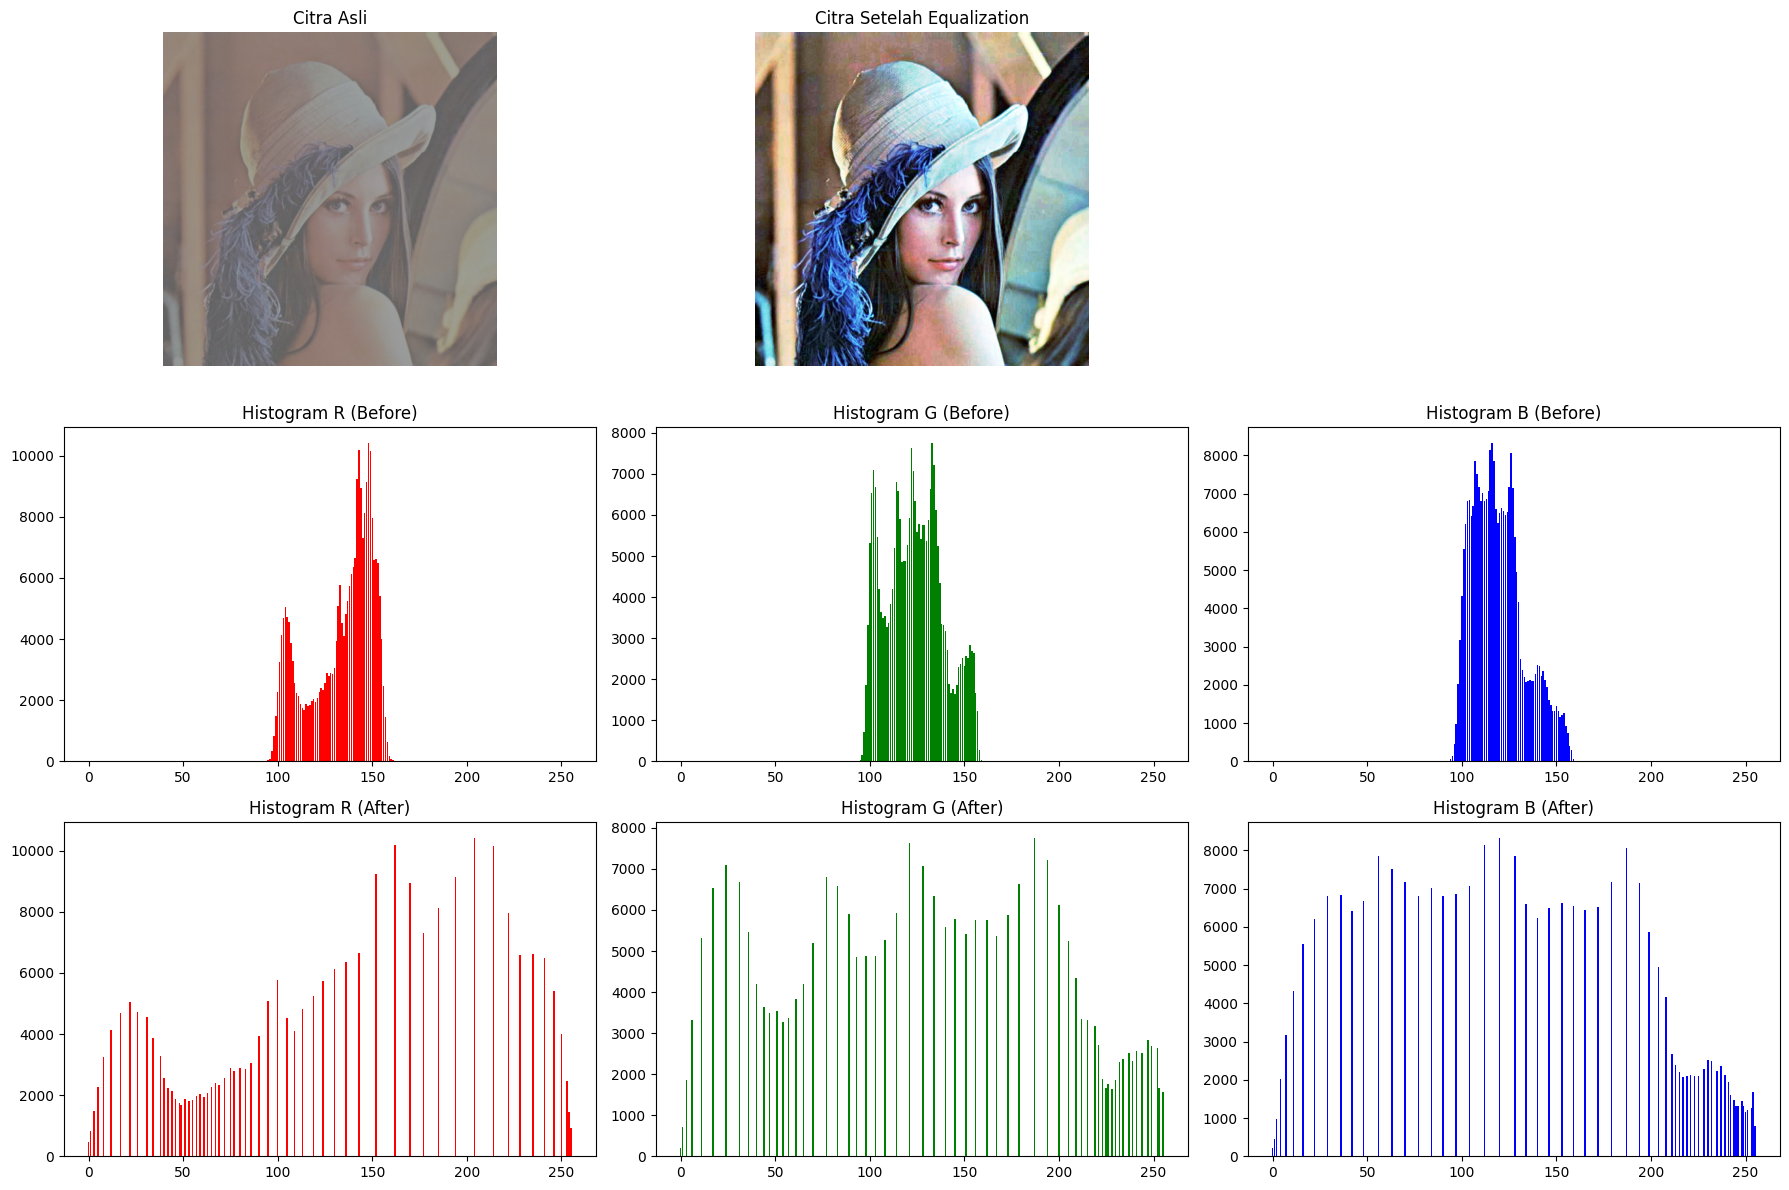

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# baca gambar
img = cv.imread('/content/drive/MyDrive/Image/lena_lc.jpg')
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, cek path atau nama file!")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

img_eq = cv.merge((r_eq, g_eq, b_eq))

hist_r, _ = np.histogram(r.flatten(), bins=256, range=(0,256))
hist_g, _ = np.histogram(g.flatten(), bins=256, range=(0,256))
hist_b, _ = np.histogram(b.flatten(), bins=256, range=(0,256))

hist_r_eq, _ = np.histogram(r_eq.flatten(), bins=256, range=(0,256))
hist_g_eq, _ = np.histogram(g_eq.flatten(), bins=256, range=(0,256))
hist_b_eq, _ = np.histogram(b_eq.flatten(), bins=256, range=(0,256))


fig, axs = plt.subplots(3, 3, figsize=(18,12))

# gambar asli & hasil
axs[0,0].imshow(img)
axs[0,0].set_title("Citra Asli")
axs[0,0].axis("off")

axs[0,1].imshow(img_eq)
axs[0,1].set_title("Citra Setelah Equalization")
axs[0,1].axis("off")

axs[0,2].axis("off")

# histogram sebelum
axs[1,0].bar(np.arange(256), hist_r, color='red')
axs[1,0].set_title("Histogram R (Before)")
axs[1,1].bar(np.arange(256), hist_g, color='green')
axs[1,1].set_title("Histogram G (Before)")
axs[1,2].bar(np.arange(256), hist_b, color='blue')
axs[1,2].set_title("Histogram B (Before)")

# histogram sesudah
axs[2,0].bar(np.arange(256), hist_r_eq, color='red')
axs[2,0].set_title("Histogram R (After)")
axs[2,1].bar(np.arange(256), hist_g_eq, color='green')
axs[2,1].set_title("Histogram G (After)")
axs[2,2].bar(np.arange(256), hist_b_eq, color='blue')
axs[2,2].set_title("Histogram B (After)")

plt.tight_layout()
plt.show()



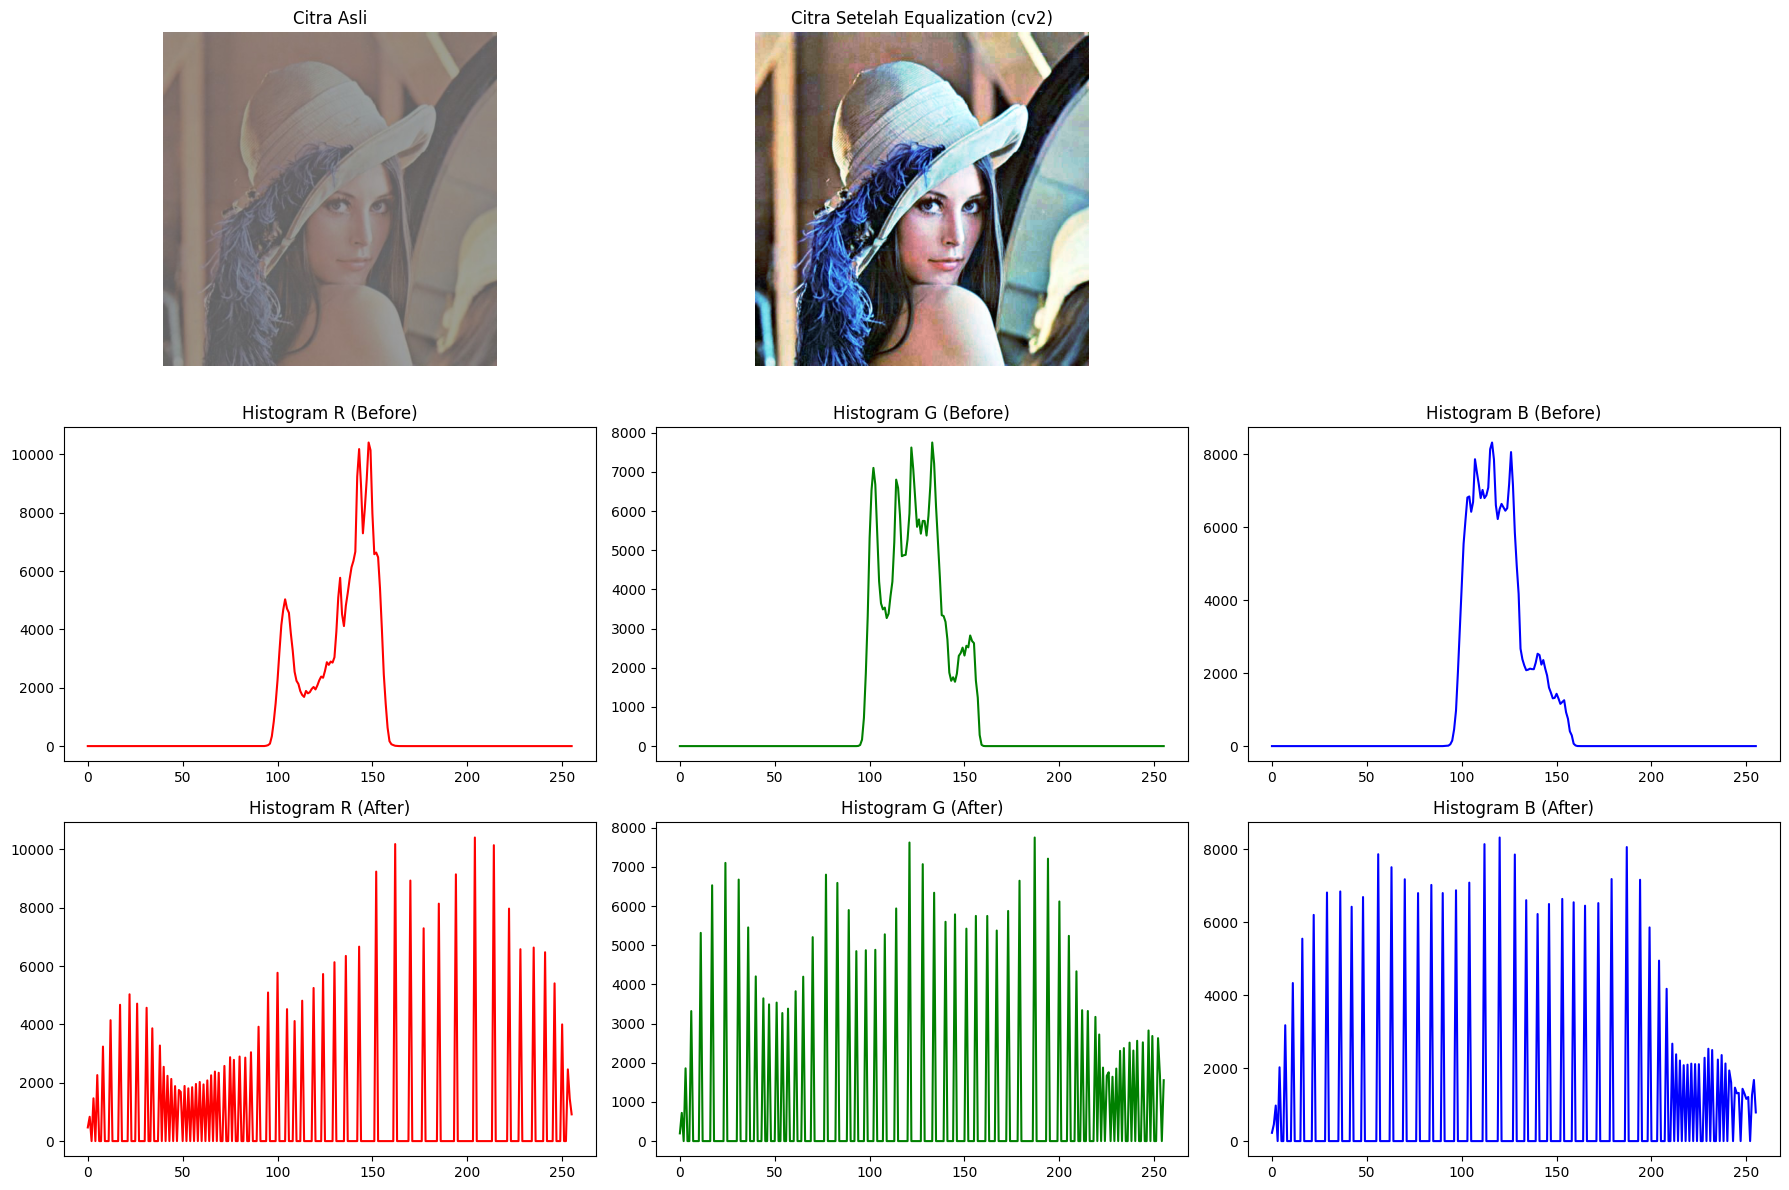

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# baca gambar
img = cv.imread('/content/drive/MyDrive/Image/lena_lc.jpg')
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, cek path atau nama file!")

# konversi ke RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# pisahkan channel
r, g, b = cv.split(img)

# equalization per channel menggunakan cv2.equalizeHist
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# gabungkan kembali jadi citra RGB
img_eq = cv.merge((r_eq, g_eq, b_eq))

# hitung histogram sebelum & sesudah dengan cv.calcHist
hist_r = cv.calcHist([r], [0], None, [256], [0,256])
hist_g = cv.calcHist([g], [0], None, [256], [0,256])
hist_b = cv.calcHist([b], [0], None, [256], [0,256])

hist_r_eq = cv.calcHist([r_eq], [0], None, [256], [0,256])
hist_g_eq = cv.calcHist([g_eq], [0], None, [256], [0,256])
hist_b_eq = cv.calcHist([b_eq], [0], None, [256], [0,256])

# tampilkan hasil
fig, axs = plt.subplots(3, 3, figsize=(18,12))

# gambar asli & hasil
axs[0,0].imshow(img)
axs[0,0].set_title("Citra Asli")
axs[0,0].axis("off")

axs[0,1].imshow(img_eq)
axs[0,1].set_title("Citra Setelah Equalization (cv2)")
axs[0,1].axis("off")

axs[0,2].axis("off")

# histogram sebelum
axs[1,0].plot(hist_r, color='red')
axs[1,0].set_title("Histogram R (Before)")
axs[1,1].plot(hist_g, color='green')
axs[1,1].set_title("Histogram G (Before)")
axs[1,2].plot(hist_b, color='blue')
axs[1,2].set_title("Histogram B (Before)")

# histogram sesudah
axs[2,0].plot(hist_r_eq, color='red')
axs[2,0].set_title("Histogram R (After)")
axs[2,1].plot(hist_g_eq, color='green')
axs[2,1].set_title("Histogram G (After)")
axs[2,2].plot(hist_b_eq, color='blue')
axs[2,2].set_title("Histogram B (After)")

plt.tight_layout()
plt.show()


1. Perbandingan Citra Lena
a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

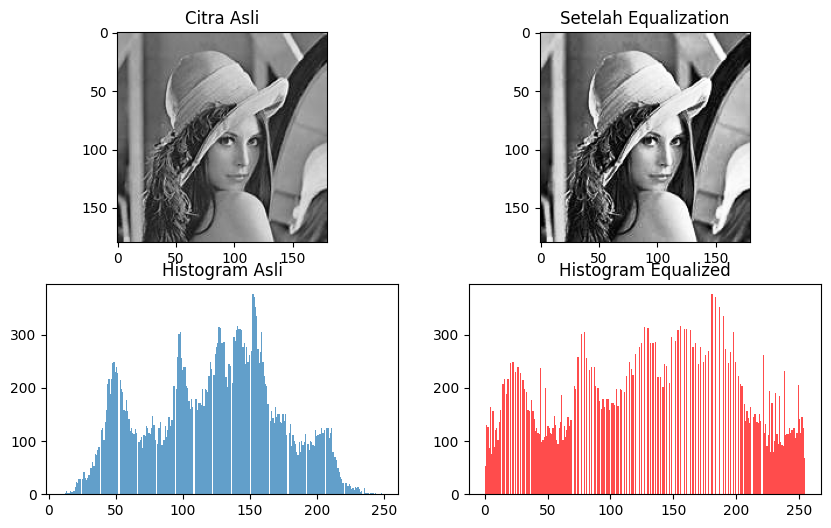

MSE: 115.24
PSNR: 27.51 dB
PSNR sedang - ada perubahan tapi masih oke
Kontras asli: 48.3
Kontras setelah: 73.6
Ada detail baru - kontras meningkat


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra lena
img = cv.imread('/content/drive/MyDrive/Image/lenna.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Histogram equalization
eq = cv2.equalizeHist(gray)

# 3. Tampilkan hasil
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(eq, cmap='gray')
plt.title('Setelah Equalization')

plt.subplot(2, 2, 3)
plt.hist(gray.flatten(), bins=256, alpha=0.7)
plt.title('Histogram Asli')

plt.subplot(2, 2, 4)
plt.hist(eq.flatten(), bins=256, alpha=0.7, color='red')
plt.title('Histogram Equalized')

plt.show()

# 4. Hitung PSNR
mse = np.mean((gray - eq) ** 2)
psnr = 20 * np.log10(255 / np.sqrt(mse))

print(f"MSE: {mse:.2f}")
print(f"PSNR: {psnr:.2f} dB")

# 5. Analisis PSNR
if psnr > 30:
    print("PSNR tinggi - kualitas bagus")
elif psnr > 20:
    print("PSNR sedang - ada perubahan tapi masih oke")
else:
    print("PSNR rendah - perubahan cukup besar")

# 6. Cek detail baru
kontras_asli = np.std(gray)
kontras_eq = np.std(eq)

print(f"Kontras asli: {kontras_asli:.1f}")
print(f"Kontras setelah: {kontras_eq:.1f}")

if kontras_eq > kontras_asli:
    print("Ada detail baru - kontras meningkat")
else:
    print("Detail baru minimal")

2. Gunakan Citra KTM Lama.jpg

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

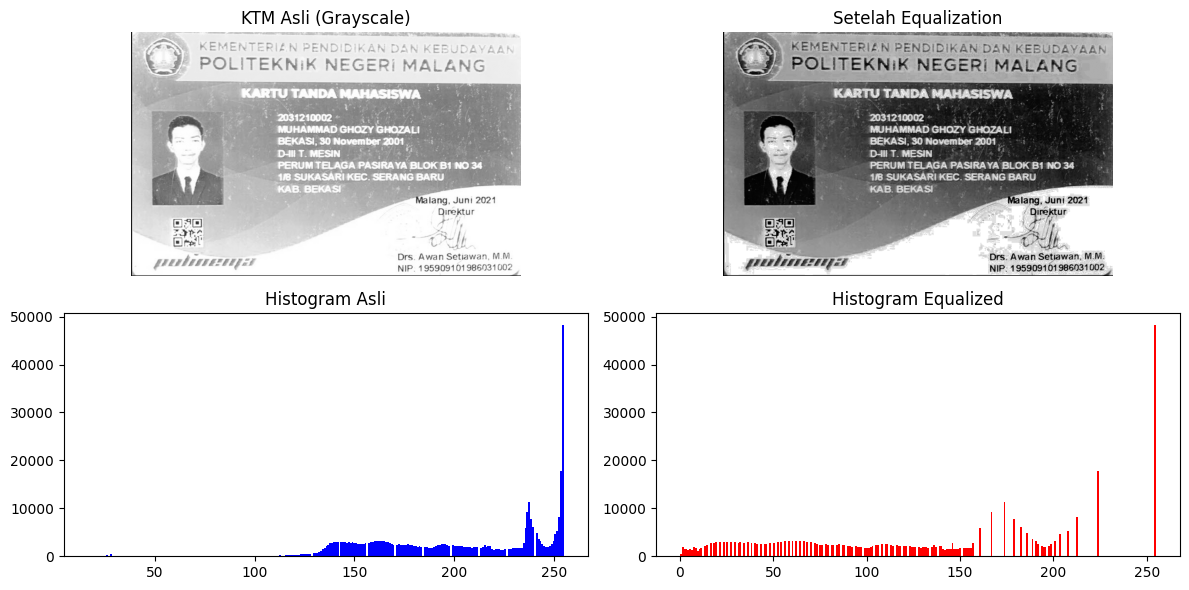

=== ANALISIS CITRA KTM ===
Ukuran citra: (500, 800)
Range intensitas asli: 16 - 255
Range intensitas equalized: 0 - 255
Mean asli: 203.2, Equalized: 130.5
Std asli: 44.3, Equalized: 76.8

✓ Histogram equalization berhasil meningkatkan kontras.
✓ Teks dan detail pada KTM lebih jelas.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra dan ubah ke grayscale
img = cv2.imread('/content/drive/MyDrive/Image/KTM lama.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Histogram equalization
eq = cv2.equalizeHist(gray)

# 3. Tampilkan citra asli, equalized, dan histogram
plt.figure(figsize=(12,6))

# Grayscale asli
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title('KTM Asli (Grayscale)')
plt.axis('off')

# Equalized
plt.subplot(2,2,2)
plt.imshow(eq, cmap='gray')
plt.title('Setelah Equalization')
plt.axis('off')

# Histogram asli
plt.subplot(2,2,3)
plt.hist(gray.ravel(), 256, color='blue')
plt.title('Histogram Asli')

# Histogram equalized
plt.subplot(2,2,4)
plt.hist(eq.ravel(), 256, color='red')
plt.title('Histogram Equalized')

plt.tight_layout()
plt.show()

# 4. Analisis statistik sederhana
print("=== ANALISIS CITRA KTM ===")
print(f"Ukuran citra: {gray.shape}")
print(f"Range intensitas asli: {gray.min()} - {gray.max()}")
print(f"Range intensitas equalized: {eq.min()} - {eq.max()}")
print(f"Mean asli: {np.mean(gray):.1f}, Equalized: {np.mean(eq):.1f}")
print(f"Std asli: {np.std(gray):.1f}, Equalized: {np.std(eq):.1f}")

# 5. Kesimpulan sederhana
if np.std(eq) > np.std(gray):
    print("\n✓ Histogram equalization berhasil meningkatkan kontras.")
    print("✓ Teks dan detail pada KTM lebih jelas.")
else:
    print("\n○ Perubahan kontras tidak signifikan.")


**D-3 TUGAS PRAKTIKUM DITHERING**

1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

Saving lena.jpg to lena.jpg


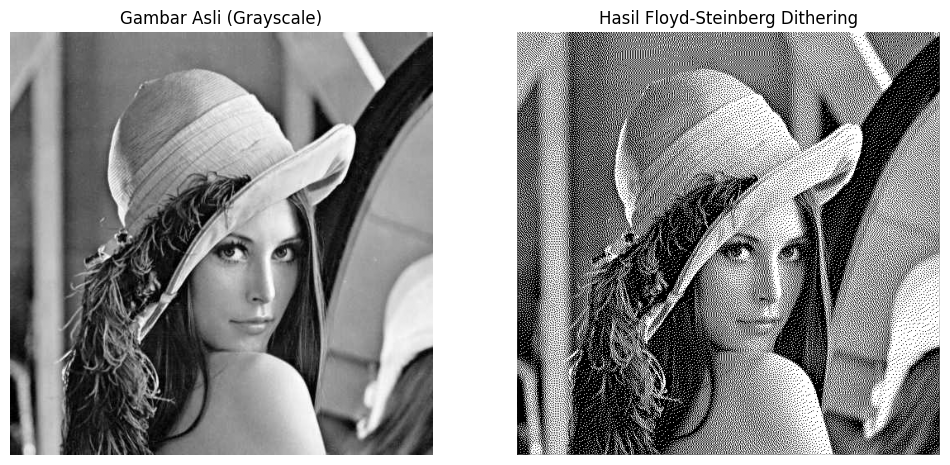

In [9]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Upload gambar lena.jpg
uploaded = files.upload()  # pilih file lena.jpg dari komputer

# 2. Baca gambar dalam grayscale
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Gambar lena.jpg tidak ditemukan, pastikan sudah diupload dengan benar.")

# 3. Buat salinan untuk dithering
dithered = img.astype(np.float32)

# 4. Floyd-Steinberg Dithering
rows, cols = dithered.shape
for y in range(rows - 1):
    for x in range(1, cols - 1):
        old_pixel = dithered[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered[y, x] = new_pixel
        quant_error = old_pixel - new_pixel

        dithered[y, x+1]   += quant_error * 7/16
        dithered[y+1, x-1] += quant_error * 3/16
        dithered[y+1, x]   += quant_error * 5/16
        dithered[y+1, x+1] += quant_error * 1/16

# 5. Konversi hasil ke uint8
dithered = np.clip(dithered, 0, 255).astype(np.uint8)

# 6. Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Gambar Asli (Grayscale)")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Hasil Floyd-Steinberg Dithering")
plt.imshow(dithered, cmap='gray')
plt.axis("off")

plt.show()


2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

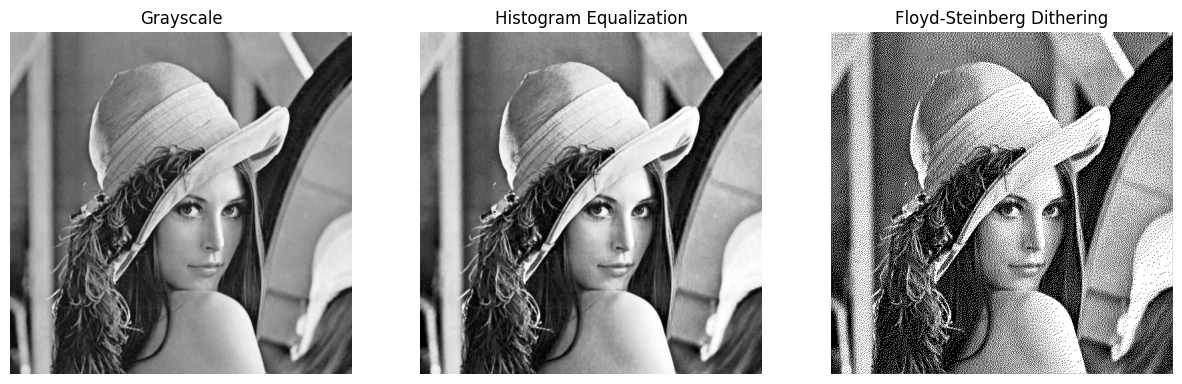

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# 1. Baca gambar dari Google Drive
img = cv.imread('/content/drive/MyDrive/Image/lena_lc.jpg')

# 2. Ubah ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 3. Histogram Equalization
eq = cv.equalizeHist(gray)

# 4. Floyd-Steinberg Dithering pada hasil equalization
dithered = eq.astype(np.float32)
rows, cols = dithered.shape

for y in range(rows - 1):
    for x in range(1, cols - 1):
        old_pixel = dithered[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered[y, x] = new_pixel
        quant_error = old_pixel - new_pixel

        # Sebarkan error ke piksel tetangga
        dithered[y, x+1]   += quant_error * 7/16
        dithered[y+1, x-1] += quant_error * 3/16
        dithered[y+1, x]   += quant_error * 5/16
        dithered[y+1, x+1] += quant_error * 1/16

# Konversi hasil ke uint8
dithered = np.clip(dithered, 0, 255).astype(np.uint8)

# 5. Tampilkan hasil
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Histogram Equalization")
plt.imshow(eq, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Floyd-Steinberg Dithering")
plt.imshow(dithered, cmap='gray')
plt.axis("off")

plt.show()
